File saved as /content/Modified_Sales_Data.csv


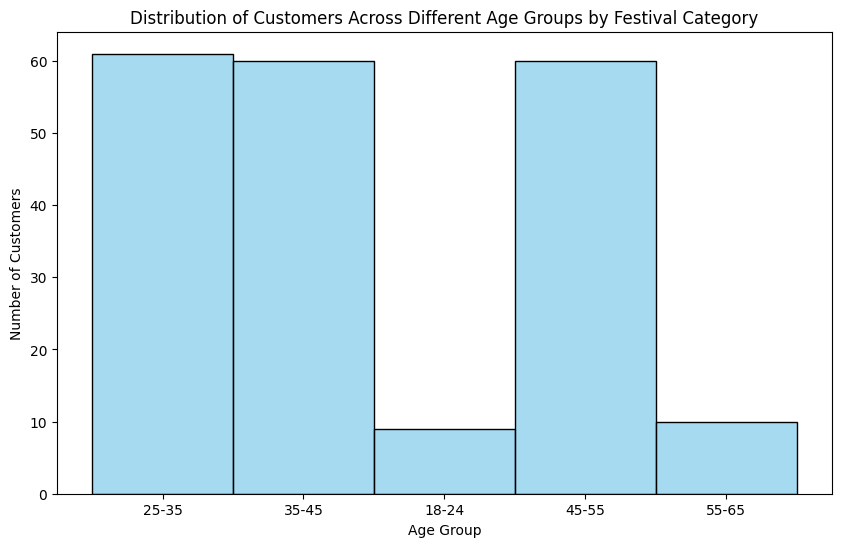

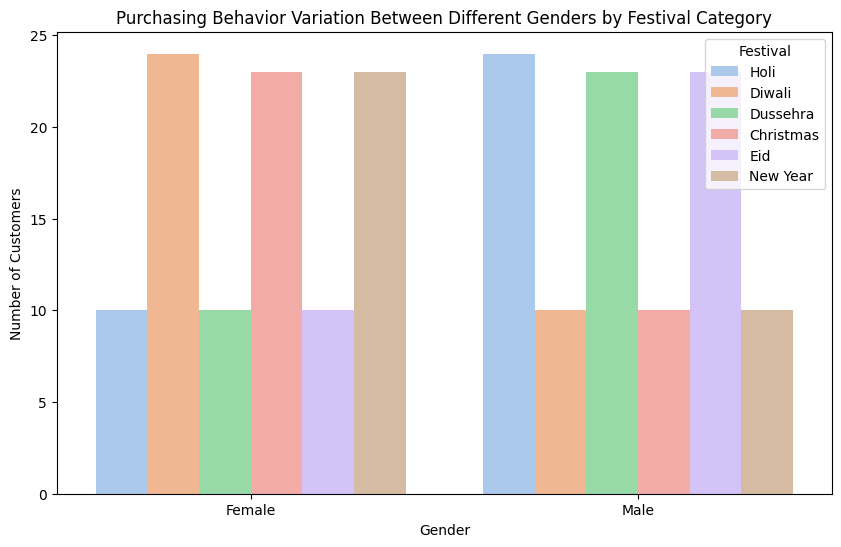

<Figure size 1000x600 with 0 Axes>

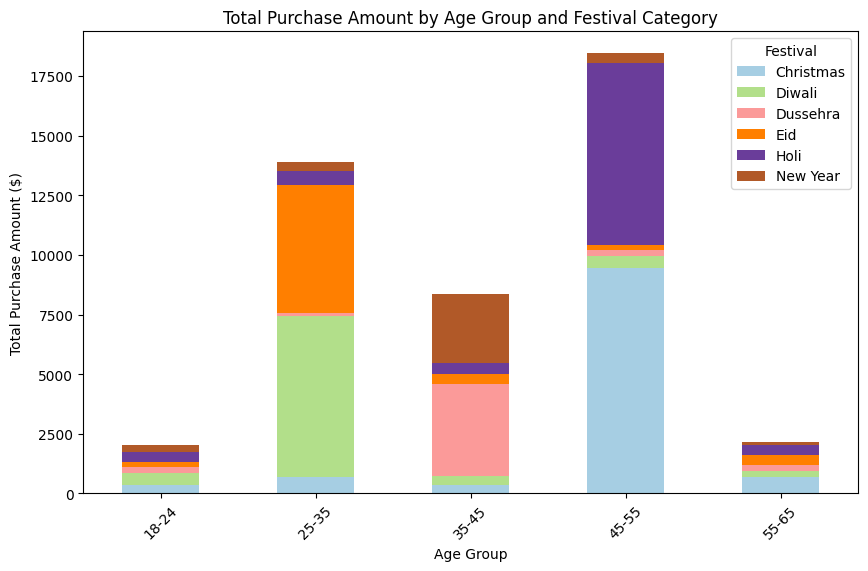

The state contributing the most to Diwali sales: California


<ipython-input-1-9e18319087aa>:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Zone', y='Amount', hue='Festival', data=df, ci=None, palette='pastel')


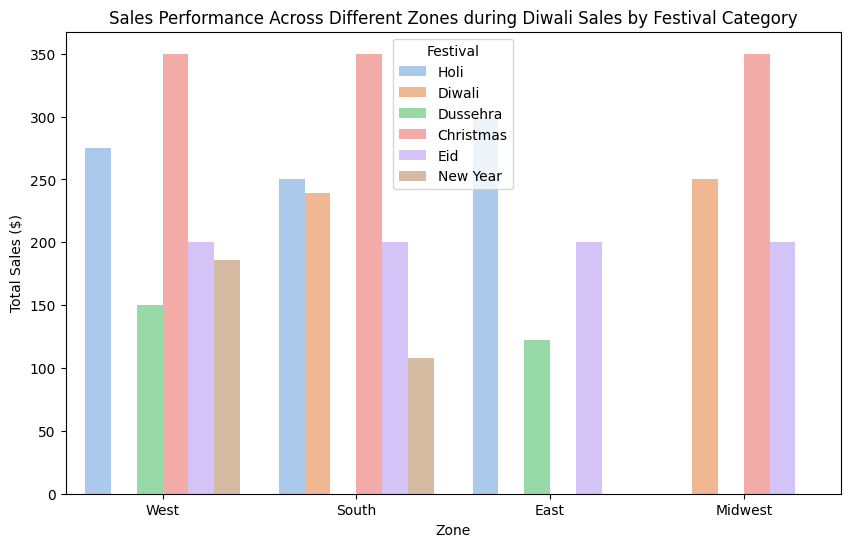

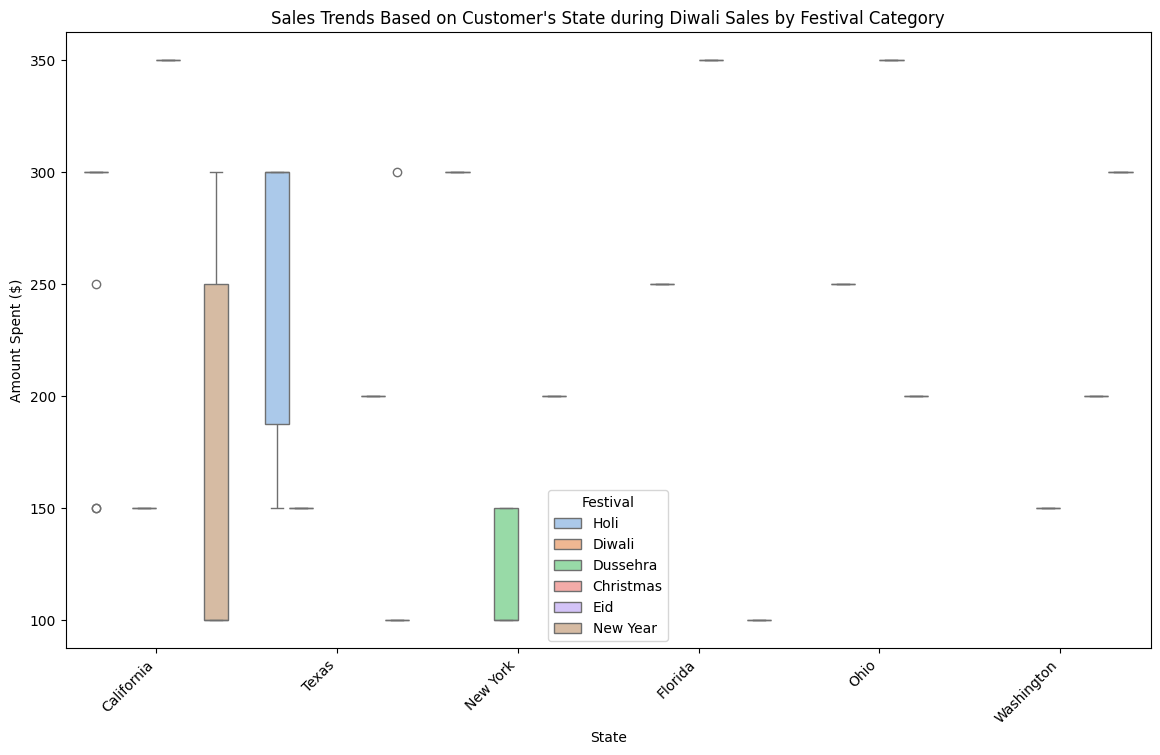

<Figure size 1200x600 with 0 Axes>

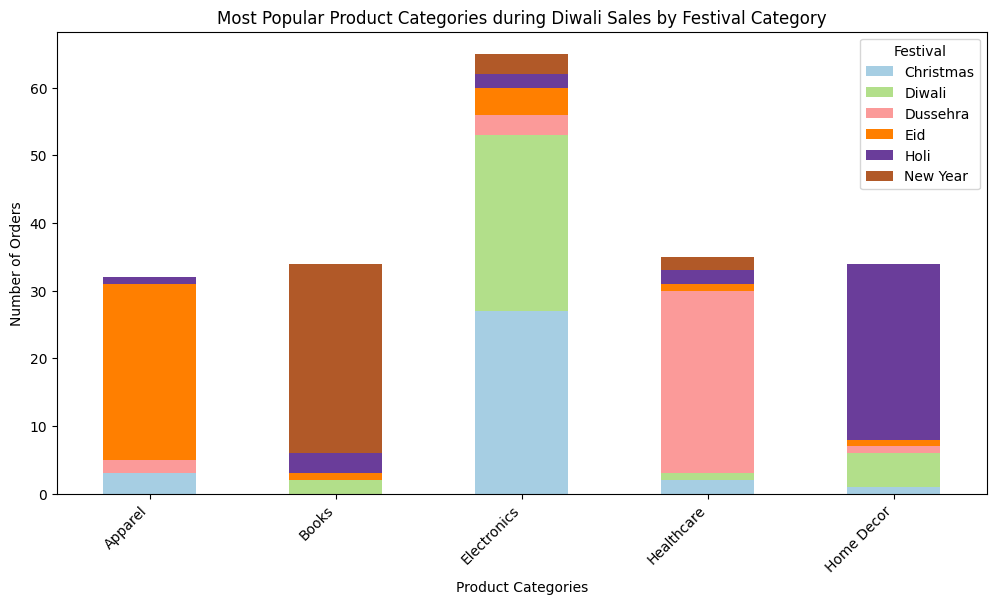

<Figure size 1200x600 with 0 Axes>

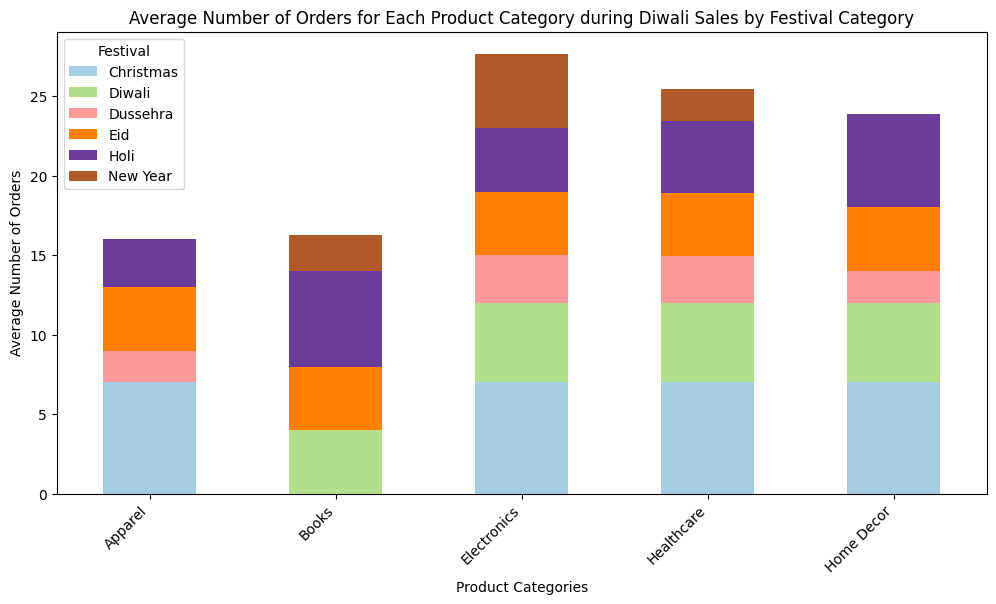

<Figure size 1200x600 with 0 Axes>

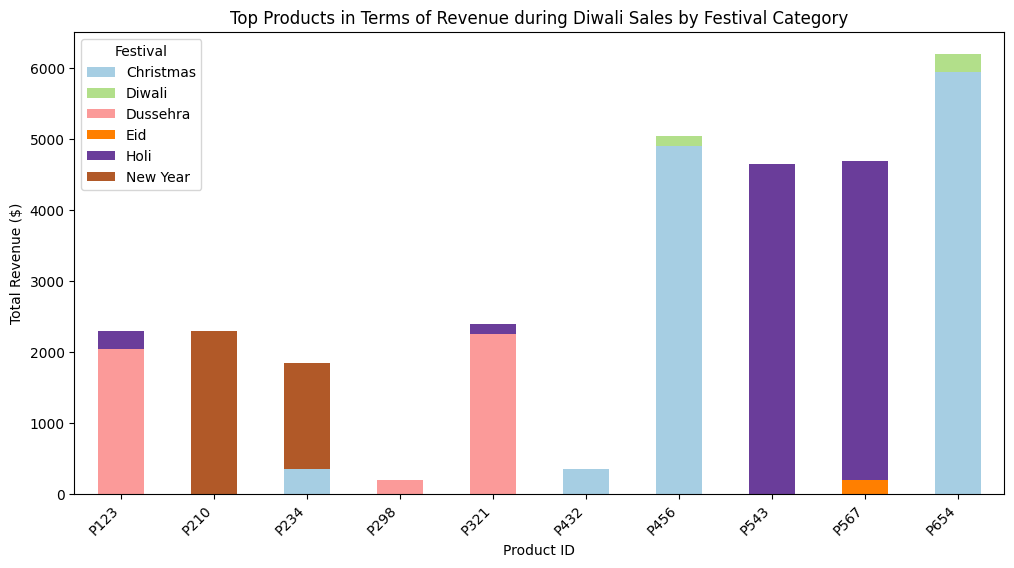

<ipython-input-1-9e18319087aa>:100: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y='Amount', hue='Festival', data=df, estimator='sum', ci=None)


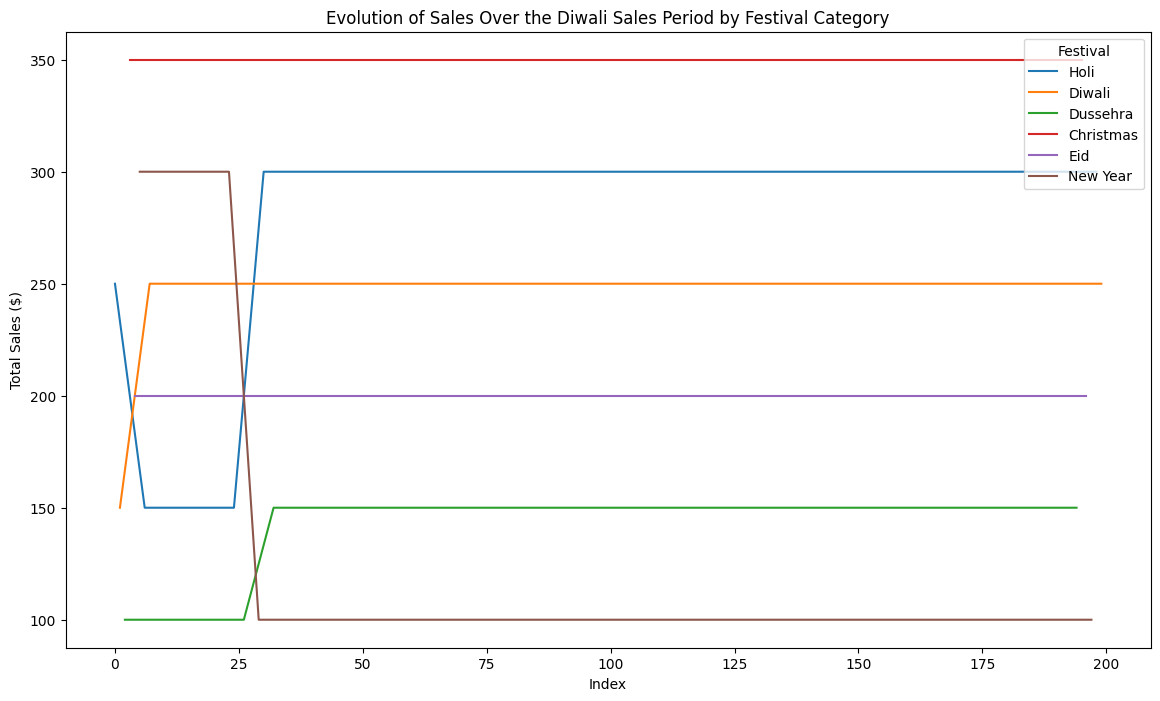

<Figure size 1000x600 with 0 Axes>

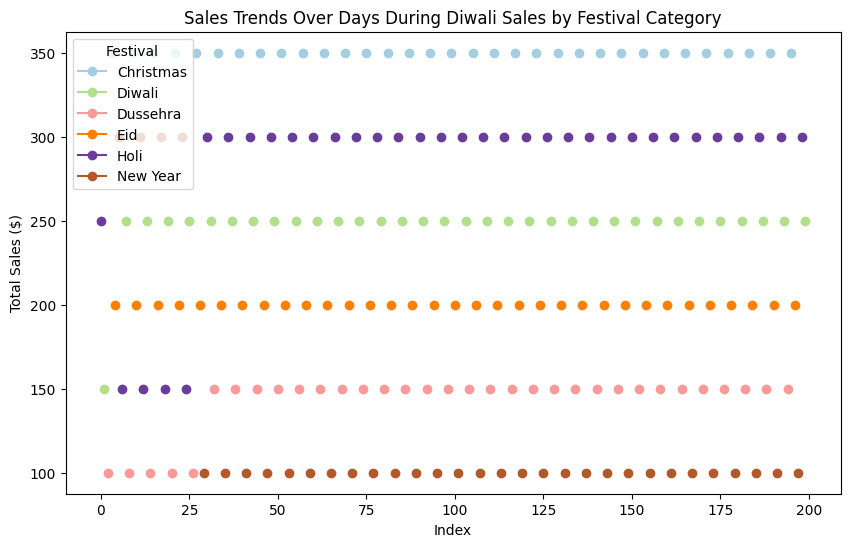

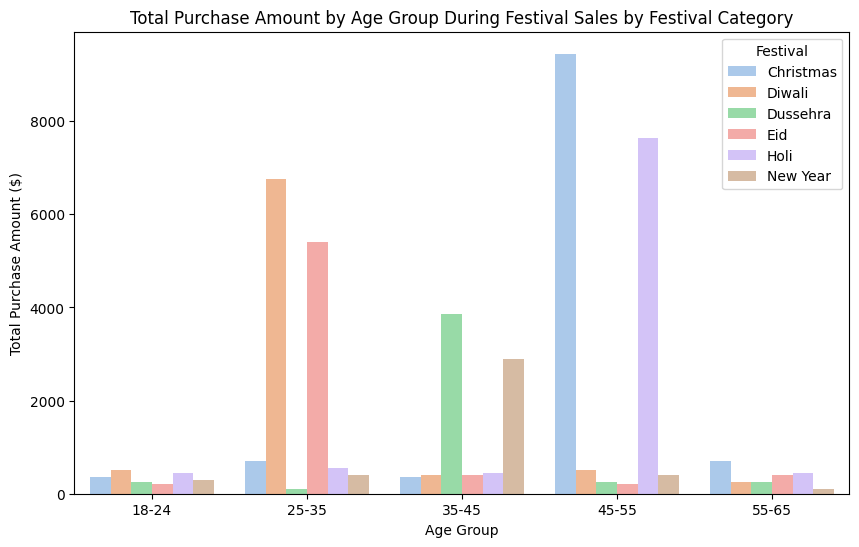

Correlation between Age and Amount Spent: 0.32


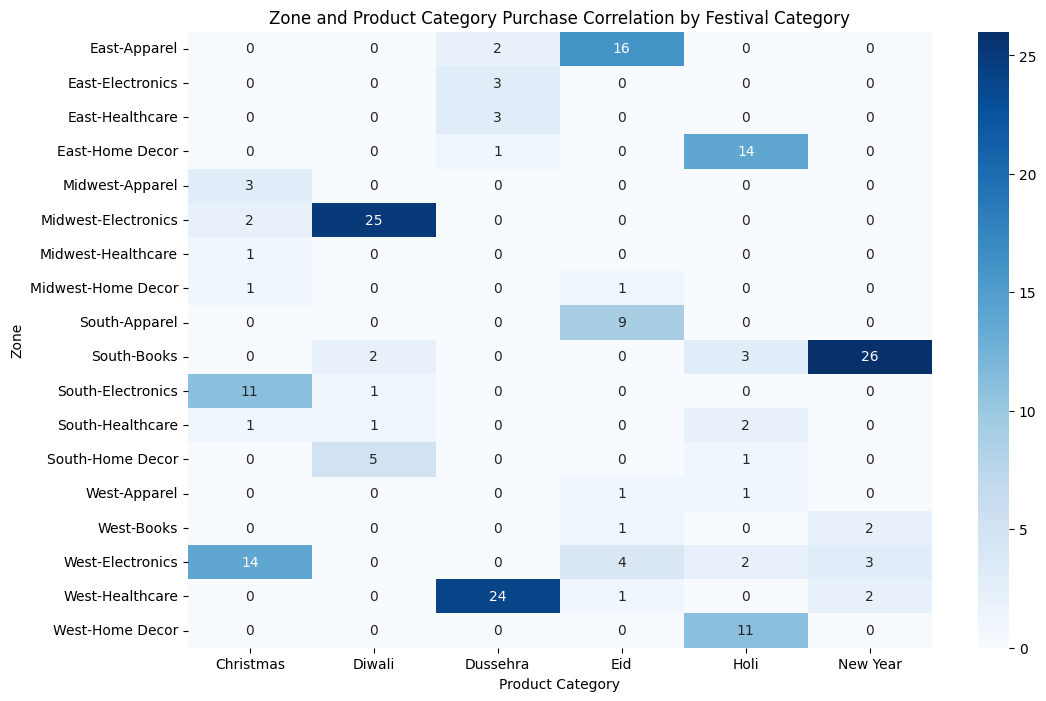

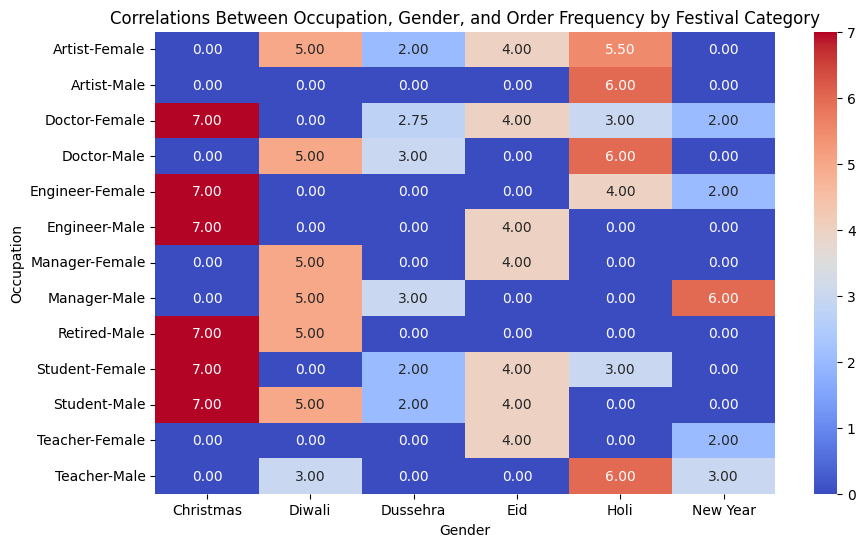

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-1-9e18319087aa>:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Festival'] = pd.factorize(X['Festival'])[0]


            User_ID        Age    Orders      Amount      sales  Cluster
Cluster                                                                 
0         99.089552  39.835821  2.492537  124.626866  64.000000      0.0
1        100.985075  32.970149  4.507463  225.373134  66.074627      1.0
2        101.439394  48.272727  6.500000  325.000000  63.000000      2.0
Training R^2: 0.17743116318752883
Testing R^2: 0.11003324611344445


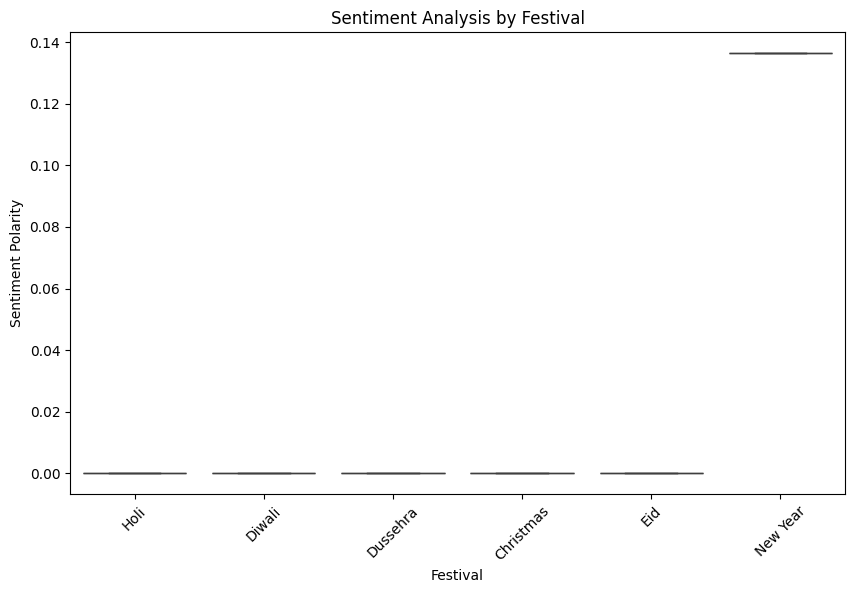

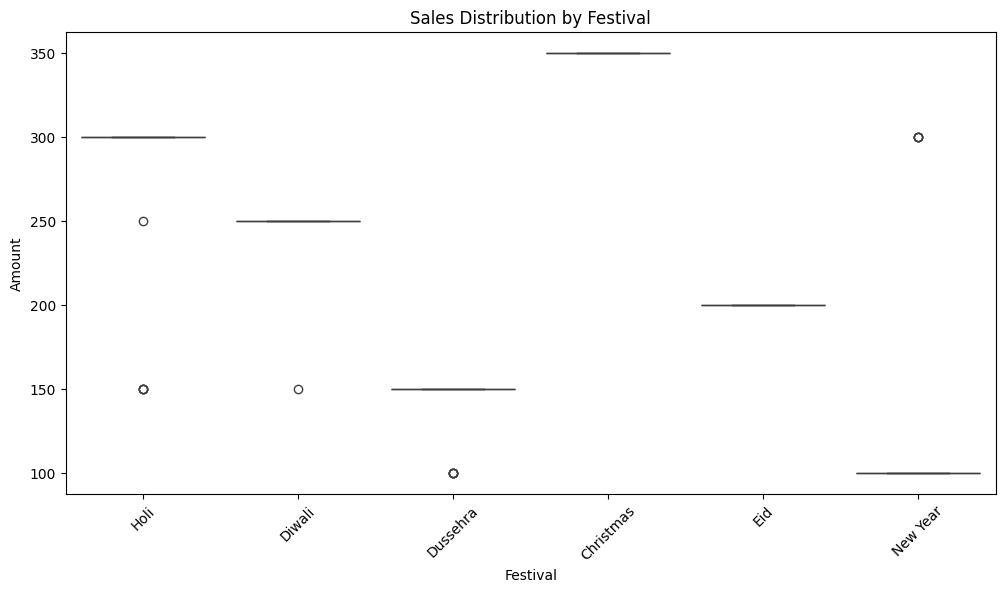

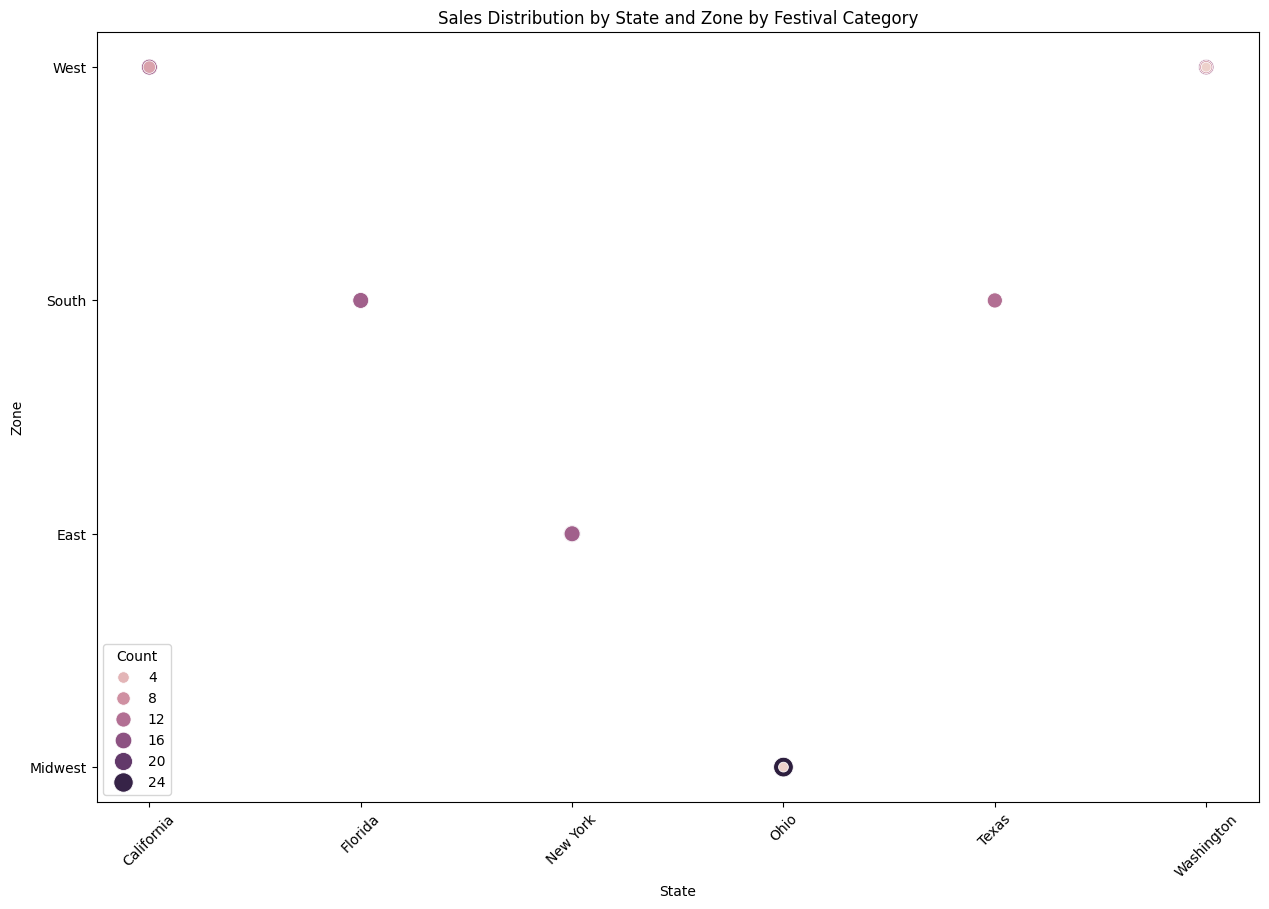

Association Rules:
                                          antecedents  \
0                                   (Festival_Diwali)   
1                                        (State_Ohio)   
2                                   (Festival_Diwali)   
3                                      (Zone_Midwest)   
4                                 (Festival_Dussehra)   
5                                     (Festival_Holi)   
6                                 (Festival_New Year)   
7                                     (State_Florida)   
8                                    (State_New York)   
9                                        (State_Ohio)   
10                                     (Zone_Midwest)   
11                                      (State_Texas)   
12                                 (State_Washington)   
13                                 (State_Washington)   
14                      (Festival_Diwali, State_Ohio)   
15                    (Festival_Diwali, Zone_Midwest)   
16          

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from textblob import TextBlob
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules



# Data Preprocessing and Exploration
df = pd.read_csv('/content/QWE.CSV', encoding='unicode_escape')
df.drop(['Unnamed1'], axis=1, inplace=True)
df.dropna(inplace=True)
df['Amount'] = df['Amount'].astype('int')
df.rename(columns={'Marital_Status': 'Shaadi'}, inplace=True)
df.describe()
output_file_path = '/content/Modified_Sales_Data.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8')
print(f"File saved as {output_file_path}")

# Customer Demographics Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Age Group'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Customers Across Different Age Groups by Festival Category')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Festival', data=df, palette='pastel')
plt.title('Purchasing Behavior Variation Between Different Genders by Festival Category')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10, 6))
age_group_amount = df.groupby(['Age Group', 'Festival'])['Amount'].sum().unstack()
age_group_amount.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Total Purchase Amount by Age Group and Festival Category')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount ($)')
plt.xticks(rotation=45)
plt.show()

# Geographical Analysis
state_contribution = df.groupby('State')['Amount'].sum().sort_values(ascending=False)
most_contributing_state = state_contribution.idxmax()
print(f"The state contributing the most to Diwali sales: {most_contributing_state}")

plt.figure(figsize=(10, 6))
sns.barplot(x='Zone', y='Amount', hue='Festival', data=df, ci=None, palette='pastel')
plt.title('Sales Performance Across Different Zones during Diwali Sales by Festival Category')
plt.xlabel('Zone')
plt.ylabel('Total Sales ($)')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='Amount', hue='Festival', data=df, palette='pastel')
plt.title('Sales Trends Based on Customer\'s State during Diwali Sales by Festival Category')
plt.xlabel('State')
plt.ylabel('Amount Spent ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Product Analysis
plt.figure(figsize=(12, 6))
popular_categories = df.groupby(['Product_Category', 'Festival']).size().unstack().fillna(0)
popular_categories.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Most Popular Product Categories during Diwali Sales by Festival Category')
plt.xlabel('Product Categories')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
average_orders_per_category = df.groupby(['Product_Category', 'Festival'])['Orders'].mean().unstack().fillna(0)
average_orders_per_category.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Average Number of Orders for Each Product Category during Diwali Sales by Festival Category')
plt.xlabel('Product Categories')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
top_revenue_products = df.groupby(['Product_ID', 'Festival'])['Amount'].sum().unstack().fillna(0).head(10)
top_revenue_products.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Top Products in Terms of Revenue during Diwali Sales by Festival Category')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sales Trends Analysis
plt.figure(figsize=(14, 8))
sns.lineplot(x=df.index, y='Amount', hue='Festival', data=df, estimator='sum', ci=None)
plt.title('Evolution of Sales Over the Diwali Sales Period by Festival Category')
plt.xlabel('Index')
plt.ylabel('Total Sales ($)')
plt.show()

plt.figure(figsize=(10, 6))
sales_by_day = df.groupby([df.index, 'Festival'])['Amount'].sum().unstack()
sales_by_day.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6), colormap='Paired')
plt.title('Sales Trends Over Days During Diwali Sales by Festival Category')
plt.xlabel('Index')
plt.ylabel('Total Sales ($)')
plt.show()

plt.figure(figsize=(10, 6))
age_group_purchase = df.groupby(['Age Group', 'Festival'])['Amount'].sum().unstack()
age_group_purchase = age_group_purchase.reset_index()  # Reset index to make 'Age Group' a column
age_group_purchase_melted = age_group_purchase.melt(id_vars='Age Group', var_name='Festival', value_name='Total Purchase Amount')
sns.barplot(x='Age Group', y='Total Purchase Amount', hue='Festival', data=age_group_purchase_melted, palette='pastel')
plt.title('Total Purchase Amount by Age Group During Festival Sales by Festival Category')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount ($)')
plt.show()


# Correlation Analysis
correlation_age_amount = df['Age'].corr(df['Amount'])
print(f"Correlation between Age and Amount Spent: {correlation_age_amount:.2f}")

zone_product_correlation = df.groupby(['Zone', 'Product_Category', 'Festival']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(zone_product_correlation, cmap='Blues', annot=True, fmt='g')
plt.title('Zone and Product Category Purchase Correlation by Festival Category')
plt.xlabel('Product Category')
plt.ylabel('Zone')
plt.show()

occupation_gender_order_correlation = df.groupby(['Occupation', 'Gender', 'Festival'])['Orders'].mean().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(occupation_gender_order_correlation, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlations Between Occupation, Gender, and Order Frequency by Festival Category')
plt.xlabel('Gender')
plt.ylabel('Occupation')
plt.show()

# Additional Mining Techniques
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Orders', 'Amount']])
numeric_columns = df.select_dtypes(include=np.number).columns  # Select numeric columns
print(df.groupby('Cluster')[numeric_columns].mean())  # Apply mean() to numeric columns only


X = df[['Festival']]
y = df['Orders']
X['Festival'] = pd.factorize(X['Festival'])[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Training R^2:", model.score(X_train, y_train))
print("Testing R^2:", model.score(X_test, y_test))

df['Sentiment'] = df['Festival'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Festival', y='Sentiment', data=df)
plt.title('Sentiment Analysis by Festival')
plt.xlabel('Festival')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Festival', y='Amount', data=df)
plt.title('Sales Distribution by Festival')
plt.xlabel('Festival')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

state_zone_data = df.groupby(['State', 'Zone', 'Festival']).size().reset_index(name='Count')
plt.figure(figsize=(15, 10))
sns.scatterplot(data=state_zone_data, x='State', y='Zone', hue='Count', size='Count', sizes=(50, 200))
plt.title('Sales Distribution by State and Zone by Festival Category')
plt.xlabel('State')
plt.ylabel('Zone')
plt.xticks(rotation=45)
plt.legend(title='Count')
plt.show()

data_encoded = pd.get_dummies(df[['Festival', 'State', 'Zone', 'Gender']], drop_first=True)
frequent_itemsets = apriori(data_encoded, min_support=0.05, use_colnames=True)
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("Association Rules:")
print(association_rules_df)

isolation_forest = IsolationForest()
df['Anomaly'] = isolation_forest.fit_predict(df[['Amount']])
anomalies = df[df['Anomaly'] == -1]
print("Anomalies:", anomalies)


